In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /Users/Pavani/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
with open('./data/airbnb-listings.csv', encoding='ascii', errors='ignore') as infile:
    df = pd.read_csv(infile, sep=';')
#df = pd.read_csv('./data/airbnb-listings.csv', sep=';')

# EDA

In [4]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11321672,https://www.airbnb.com/rooms/11321672,20170306202425,2017-03-07,Private BR in Artsy Eastside Casa,This awesome eastside abode has a PRIVATE BEDR...,"Adorable, earthy, artsy 3 bedroom, 2 bath mid-...",This awesome eastside abode has a PRIVATE BEDR...,none,"East Side, baby! We are smack dab in the cente...",...,NaN,NaN,NaN,NaN,NaN,strict,2,NaN,"30.3065892184,-97.6726448216","Host Has Profile Pic,Host Identity Verified,Re..."
1,7651087,https://www.airbnb.com/rooms/7651087,20170306202425,2017-03-07,East Central 1950s bungalow,Charming 2-bedroom/ 1 bathroom house close to ...,"Beautiful new front patio for lounging, a full...",Charming 2-bedroom/ 1 bathroom house close to ...,none,The Upper East Side (Windsor Park Neighborhood...,...,10.0,9.0,10.0,NaN,NaN,moderate,1,3.34,"30.3173767676,-97.690462101","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,16884711,https://www.airbnb.com/rooms/16884711,20170306202425,2017-03-07,Pool Oasis in East Austin close to Mueller / SXSW,Artist's desert oasis in East Austin (close to...,NaN,Artist's desert oasis in East Austin (close to...,none,"Walk to Torchy's Tacos, voted the best tacos i...",...,NaN,NaN,NaN,NaN,NaN,moderate,1,NaN,"30.2981724842,-97.6824947663","Host Has Profile Pic,Host Identity Verified,Is..."
3,10649415,https://www.airbnb.com/rooms/10649415,20170306202425,2017-03-07,Charming Cottage 4mi to UT and DT!,Stay in our private/comfy cottage. We live on ...,Come stay in our sweet little cottage and feel...,Stay in our private/comfy cottage. We live on ...,none,We live in a quickly growing neighborhood with...,...,10.0,9.0,10.0,NaN,NaN,strict,2,2.54,"30.2974975727,-97.6789013554","Host Is Superhost,Host Has Profile Pic,Host Id..."
4,10768287,https://www.airbnb.com/rooms/10768287,20170306202425,2017-03-07,Comfortable 3/2 close to SXSW,Less than 5mi from all the SXSW action & a sto...,"Our home is located in Mueller, a new central ...",Less than 5mi from all the SXSW action & a sto...,none,Mueller is central Austin's newest and most fa...,...,10.0,10.0,9.0,NaN,NaN,moderate,2,0.85,"30.293068871,-97.7038769363","Host Has Profile Pic,Host Identity Verified,Is..."


In [5]:
df.shape

(134545, 89)

In [6]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [7]:
#df.isnull().sum().to_frame('nulls').T
nulls = df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

ID 0
Listing Url 0
Scrape ID 0
Last Scraped 0
Name 337
Summary 4240
Space 38430
Description 75
Experiences Offered 0
Neighborhood Overview 52014
Notes 75840
Transit 49561
Access 57282
Interaction 60103
House Rules 48581
Thumbnail Url 23959
Medium Url 23959
Picture Url 59
XL Picture Url 23959
Host ID 0
Host URL 0
Host Name 460
Host Since 287
Host Location 888
Host About 48465
Host Response Time 30778
Host Response Rate 30778
Host Acceptance Rate 115795
Host Thumbnail Url 287
Host Picture Url 287
Host Neighbourhood 21673
Host Listings Count 287
Host Total Listings Count 287
Host Verifications 59
Street 0
Neighbourhood 26718
Neighbourhood Cleansed 0
Neighbourhood Group Cleansed 89975
City 111
State 3
Zipcode 1700
Market 1027
Smart Location 1
Country Code 0
Country 0
Latitude 0
Longitude 0
Property Type 6
Room Type 0
Accommodates 61
Bathrooms 429
Bedrooms 157
Beds 229
Bed Type 0
Amenities 1227
Square Feet 132454
Price 1964
Weekly Price 111619
Monthly Price 107090
Security Deposit 76930
Cle

# Data Cleansing

In [8]:
df[['Neighbourhood', 'Neighbourhood Cleansed','Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode']]


,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode
0,NaN,78723,NaN,Austin,TX,78723
1,Windsor Park,78723,NaN,Austin,TX,78723
2,Pecan Spings,78723,NaN,Austin,TX,78723
3,Pecan Spings,78723,NaN,Austin,TX,78723
4,Mueller,78723,NaN,Austin,TX,78723
...,...,...,...,...,...,...
134540,U Street Corridor,"Howard University, Le Droit Park, Cardozo/Shaw",NaN,Washington,DC,20001
134541,U Street Corridor,"Howard University, Le Droit Park, Cardozo/Shaw",NaN,Washington,DC,20009
134542,U Street Corridor,"Howard University, Le Droit Park, Cardozo/Shaw",NaN,Washington,DC,20009
134543,Shaw,"Howard University, Le Droit Park, Cardozo/Shaw",NaN,Washington,DC,20001


In [9]:
df[['Latitude', 'Longitude','Geolocation']]

,Latitude,Longitude,Geolocation
0,30.306589,-97.672645,"30.3065892184,-97.6726448216"
1,30.317377,-97.690462,"30.3173767676,-97.690462101"
2,30.298172,-97.682495,"30.2981724842,-97.6824947663"
3,30.297498,-97.678901,"30.2974975727,-97.6789013554"
4,30.293069,-97.703877,"30.293068871,-97.7038769363"
...,...,...,...
134540,38.915822,-77.026118,"38.9158224162,-77.0261178029"
134541,38.915157,-77.029532,"38.9151571132,-77.0295317442"
134542,38.915290,-77.033042,"38.9152898424,-77.0330416082"
134543,38.915635,-77.024353,"38.9156349166,-77.024353179"


In [10]:
df.drop(columns = ['Listing Url', 'Scrape ID', 'Last Scraped','Host URL','Thumbnail Url','License', 'Medium Url','Has Availability','Host Acceptance Rate', 'Picture Url', 'XL Picture Url','Host Thumbnail Url', 'Host Picture Url', 'Geolocation','Neighbourhood','Neighbourhood Group Cleansed','Jurisdiction Names','Square Feet' ,'Weekly Price', 'Monthly Price'], inplace = True)



In [11]:
df['Room Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [12]:
df['Property Type'].unique()

array(['House', 'Bungalow', 'Townhouse', 'Apartment', 'Condominium',
       'Guesthouse', 'Serviced apartment', 'Tent', 'Other', 'Boat',
       'Loft', 'Camper/RV', 'Cabin', 'Villa', 'Bed & Breakfast',
       'Earth House', 'Dorm', 'Boutique hotel', 'Timeshare', 'Chalet',
       'Castle', 'Yurt', 'Vacation home', 'In-law', 'Hostel', 'Hut',
       'Treehouse', 'Guest suite', 'Entire Floor', 'Parking Space',
       'Train', 'Lighthouse', 'Island', nan, 'Cave', 'Tipi',
       'Nature lodge', 'Plane', 'Pension (Korea)', 'Casa particular'],
      dtype=object)

In [13]:
df['Neighbourhood Cleansed'].value_counts()

Williamsburg            3719
Bedford-Stuyvesant      2850
Harlem                  2524
East Village            2133
Venice                  2085
                        ... 
Foothill Square            1
Lopez/Kagel Canyons        1
Grant City                 1
Tijuana River Valley       1
West Pullman               1
Name: Neighbourhood Cleansed, Length: 1198, dtype: int64

In [14]:
df['City'].unique()

array(['Austin', 'Lakeway', 'Point Venture', 'West Lake Hills',
       'Manchaca', 'Chicago', 'Chicago, Illinois, US', 'Denver', 'Aurora',
       'San Diego', 'San Francisco', 'La Mesa', 'Mission, San Francisco',
       'Escondido', 'National City', 'Solana Beach', 'Santa Cruz',
       'Scotts Valley', 'Aptos', 'Soquel', 'Aptos Hills-Larkin Valley',
       'Boulder Creek', 'Seattle', nan, 'Washington', 'Washington, D.C.',
       'Sherman Oaks', 'Los Angeles', 'Beverly Hills', 'Signal Hill',
       'South Pasadena', 'Santa Monica', 'Burbank', 'Silver Lake',
       'Temple City', 'Topanga', 'Topanga Canyon', 'Venice Beach',
       'Venice', 'Marina del Rey', 'Malibu', 'Torrance', 'Agoura Hills',
       'Calabasas', 'Valley Glen', 'Van Nuys', 'Walnut', 'West Hollywood',
       'West Covina', 'Westlake Village', 'Whittier', 'Woodland Hills',
       'La Habra', 'New York', 'Manhattan', 'Fort Greene, Brooklyn',
       'Brooklyn', 'Queens', 'Bronx', 'Greenpoint, Brooklyn', 'flushing',
       

In [15]:
df['State'].unique()

array(['TX', 'IL', 'CO', 'CA', 'WA', 'DC', 'NY', 'LA', 'OR', 'TN', 'wa',
       nan, 'ny', 'MA', 'MD', 'MP', 'il', 'ca', 'Ca', 'Il', 'NJ', 'VT'],
      dtype=object)

In [16]:
df['State'].replace({"ny": "NY", "il": "IL","Il":"IL","ca":"CA","Ca":"CA","wa":"WA"}, inplace=True)
   
   

In [17]:
df['State'].value_counts()

CA    49090
NY    40751
TX     9662
DC     7756
LA     5307
IL     5208
WA     3818
MA     3585
OR     3549
TN     3277
CO     2505
MD       31
VT        1
MP        1
NJ        1
Name: State, dtype: int64

In [18]:
df.groupby(['City','State']).size().reset_index().groupby('State')[[0]].max()

,0
State,
CA,19426
CO,2497
DC,7691
IL,5186
LA,5293
MA,3382
MD,8
MP,1
NJ,1


In [19]:
df.loc[df['State'] == 'NY', 'City'] = 'NYC'

In [20]:
df.City.value_counts()

NYC                   40751
Los Angeles           19426
Austin                 9562
San Francisco          8679
Washington             7692
                      ...  
Austin, Texas, USA        1
Sun Valley                1
California                1
Del Valle                 1
-                         1
Name: City, Length: 505, dtype: int64

In [22]:
df['COUNTER'] =1
group_data = df.groupby(['State','City'])['COUNTER'].sum() #sum function
print(group_data)

State  City                                         
CA     -                                                   1
       600 Atlantic Blvd #309 Monterey Park CA 91754       1
       92110                                               1
       Acton                                               3
       Agoura Hills                                       58
                                                        ... 
WA     Ballard, Seattle                                    1
       Phinney Ridge Seattle                               1
       Seattle                                          3812
       West Seattle                                        2
       seattle                                             1
Name: COUNTER, Length: 510, dtype: int64


In [23]:
#df.groupby(['State','City']).size()
pd.crosstab(df['State'],df['City']).T

State,CA,CO,DC,IL,LA,MA,MD,MP,NJ,NY,OR,TN,TX,VT,WA
City,,,,,,,,,,,,,,,
-,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
600 Atlantic Blvd #309 Monterey Park CA 91754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92110,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ALLSTON,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
Acton,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
west Hollywood,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"west hills ,los Angeles",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"west hills,Los Angeles",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
values = df['City'].value_counts(dropna=False).keys().tolist()
counts = df['City'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

value_dict

{'NYC': 40751,
 'Los Angeles': 19426,
 'Austin': 9562,
 'San Francisco': 8679,
 'Washington': 7692,
 'San Diego': 6201,
 'New Orleans': 5293,
 'Chicago': 5186,
 'Seattle': 3812,
 'Portland': 3539,
 'Boston': 3382,
 'Nashville': 3212,
 'Denver': 2497,
 'Oakland': 1609,
 'Long Beach': 1077,
 'Santa Monica': 992,
 'West Hollywood': 939,
 'Pasadena': 588,
 'Marina del Rey': 514,
 'Beverly Hills': 490,
 'Santa Cruz': 451,
 'Malibu': 434,
 'Venice': 409,
 'Rowland Heights': 344,
 'Glendale': 315,
 'Redondo Beach': 312,
 'Burbank': 263,
 'Culver City': 255,
 'Arcadia': 240,
 'Manhattan Beach': 190,
 'Topanga': 180,
 'Inglewood': 178,
 'Torrance': 161,
 'Altadena': 159,
 'Alhambra': 150,
 'San Gabriel': 147,
 'La Jolla': 145,
 'Hermosa Beach': 137,
 'Monterey Park': 132,
 'Walnut': 125,
 'Chula Vista': 118,
 'Aptos': 99,
 'Gardena': 94,
 'Pomona': 91,
 'Santa Clarita': 90,
 'Temple City': 90,
 'El Segundo': 88,
 'Hacienda Heights': 85,
 'Hawthorne': 82,
 'Whittier': 77,
 'Del Mar': 73,
 'North

In [25]:
df1 = df[df['City'].isin(['NYC','Los Angeles','Austin','San Francisco','Washington'])]

Text(0.5, 1.0, 'City Distribution')

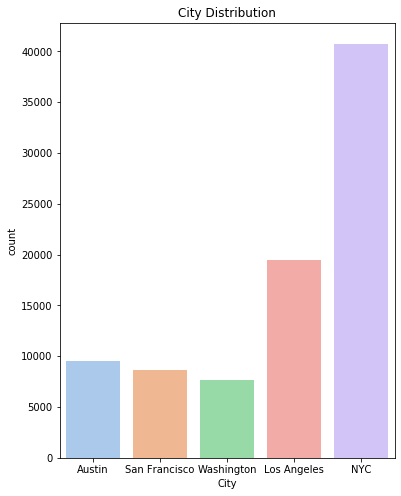

In [26]:
sns.countplot(df1['City'], palette="pastel")
fig = plt.gcf()
fig.set_size_inches(6,8)
plt.title('City Distribution')

Text(0.5, 1, 'Room Type Rental Grouping Per City')

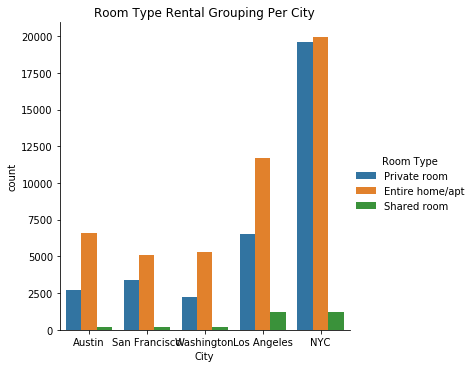

In [27]:
sns.catplot(x='City', kind="count", hue="Room Type", data=df1);
plt.title('Room Type Rental Grouping Per City')

In [28]:
df1.corr(method ="pearson")

,ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month,COUNTER
ID,1.000000,0.542294,-0.018807,-0.004930,-0.004930,-0.017740,-0.002492,-0.005244,0.011176,-0.032423,...,0.014253,0.022157,0.031756,-0.012787,-0.030430,0.051974,0.070513,0.006323,0.168756,NaN
Host ID,0.542294,1.000000,-0.029039,-0.018734,-0.018734,-0.009606,0.010834,0.004764,0.018977,-0.015441,...,-0.059644,-0.048993,-0.024245,-0.047800,-0.070501,-0.021302,-0.008596,-0.026503,0.148391,NaN
Host Response Rate,-0.018807,-0.029039,1.000000,0.003045,0.003045,-0.064129,-0.059353,0.057185,0.019290,0.023990,...,0.107891,0.100926,0.129826,0.100645,0.105575,0.050103,0.103633,0.034544,0.148502,NaN
Host Listings Count,-0.004930,-0.018734,0.003045,1.000000,1.000000,-0.034106,-0.010322,0.052651,0.062539,0.041275,...,-0.040100,-0.040540,0.007010,-0.048064,-0.071776,0.002020,-0.051378,0.621509,-0.025654,NaN
Host Total Listings Count,-0.004930,-0.018734,0.003045,1.000000,1.000000,-0.034106,-0.010322,0.052651,0.062539,0.041275,...,-0.040100,-0.040540,0.007010,-0.048064,-0.071776,0.002020,-0.051378,0.621509,-0.025654,NaN
Latitude,-0.017740,-0.009606,-0.064129,-0.034106,-0.034106,1.000000,0.703903,-0.206000,-0.206978,-0.176529,...,-0.092112,-0.065538,-0.108731,-0.059681,-0.044566,-0.092436,-0.082213,-0.125764,-0.062187,NaN
Longitude,-0.002492,0.010834,-0.059353,-0.010322,-0.010322,0.703903,1.000000,-0.104129,-0.146268,-0.087449,...,-0.061640,-0.044620,-0.088104,-0.039356,-0.021806,-0.080956,-0.044383,-0.103204,-0.087886,NaN
Accommodates,-0.005244,0.004764,0.057185,0.052651,0.052651,-0.206000,-0.104129,1.000000,0.517864,0.721212,...,0.004114,-0.010513,0.034488,-0.002681,-0.016788,-0.001995,-0.018019,0.096444,0.046939,NaN
Bathrooms,0.011176,0.018977,0.019290,0.062539,0.062539,-0.206978,-0.146268,0.517864,1.000000,0.602836,...,0.026058,0.001374,0.024283,-0.003493,-0.017520,-0.004250,0.005219,0.148320,-0.029278,NaN
Bedrooms,-0.032423,-0.015441,0.023990,0.041275,0.041275,-0.176529,-0.087449,0.721212,0.602836,1.000000,...,0.030591,0.003066,0.032704,0.014414,-0.000060,-0.000632,0.003251,0.062957,-0.051120,NaN


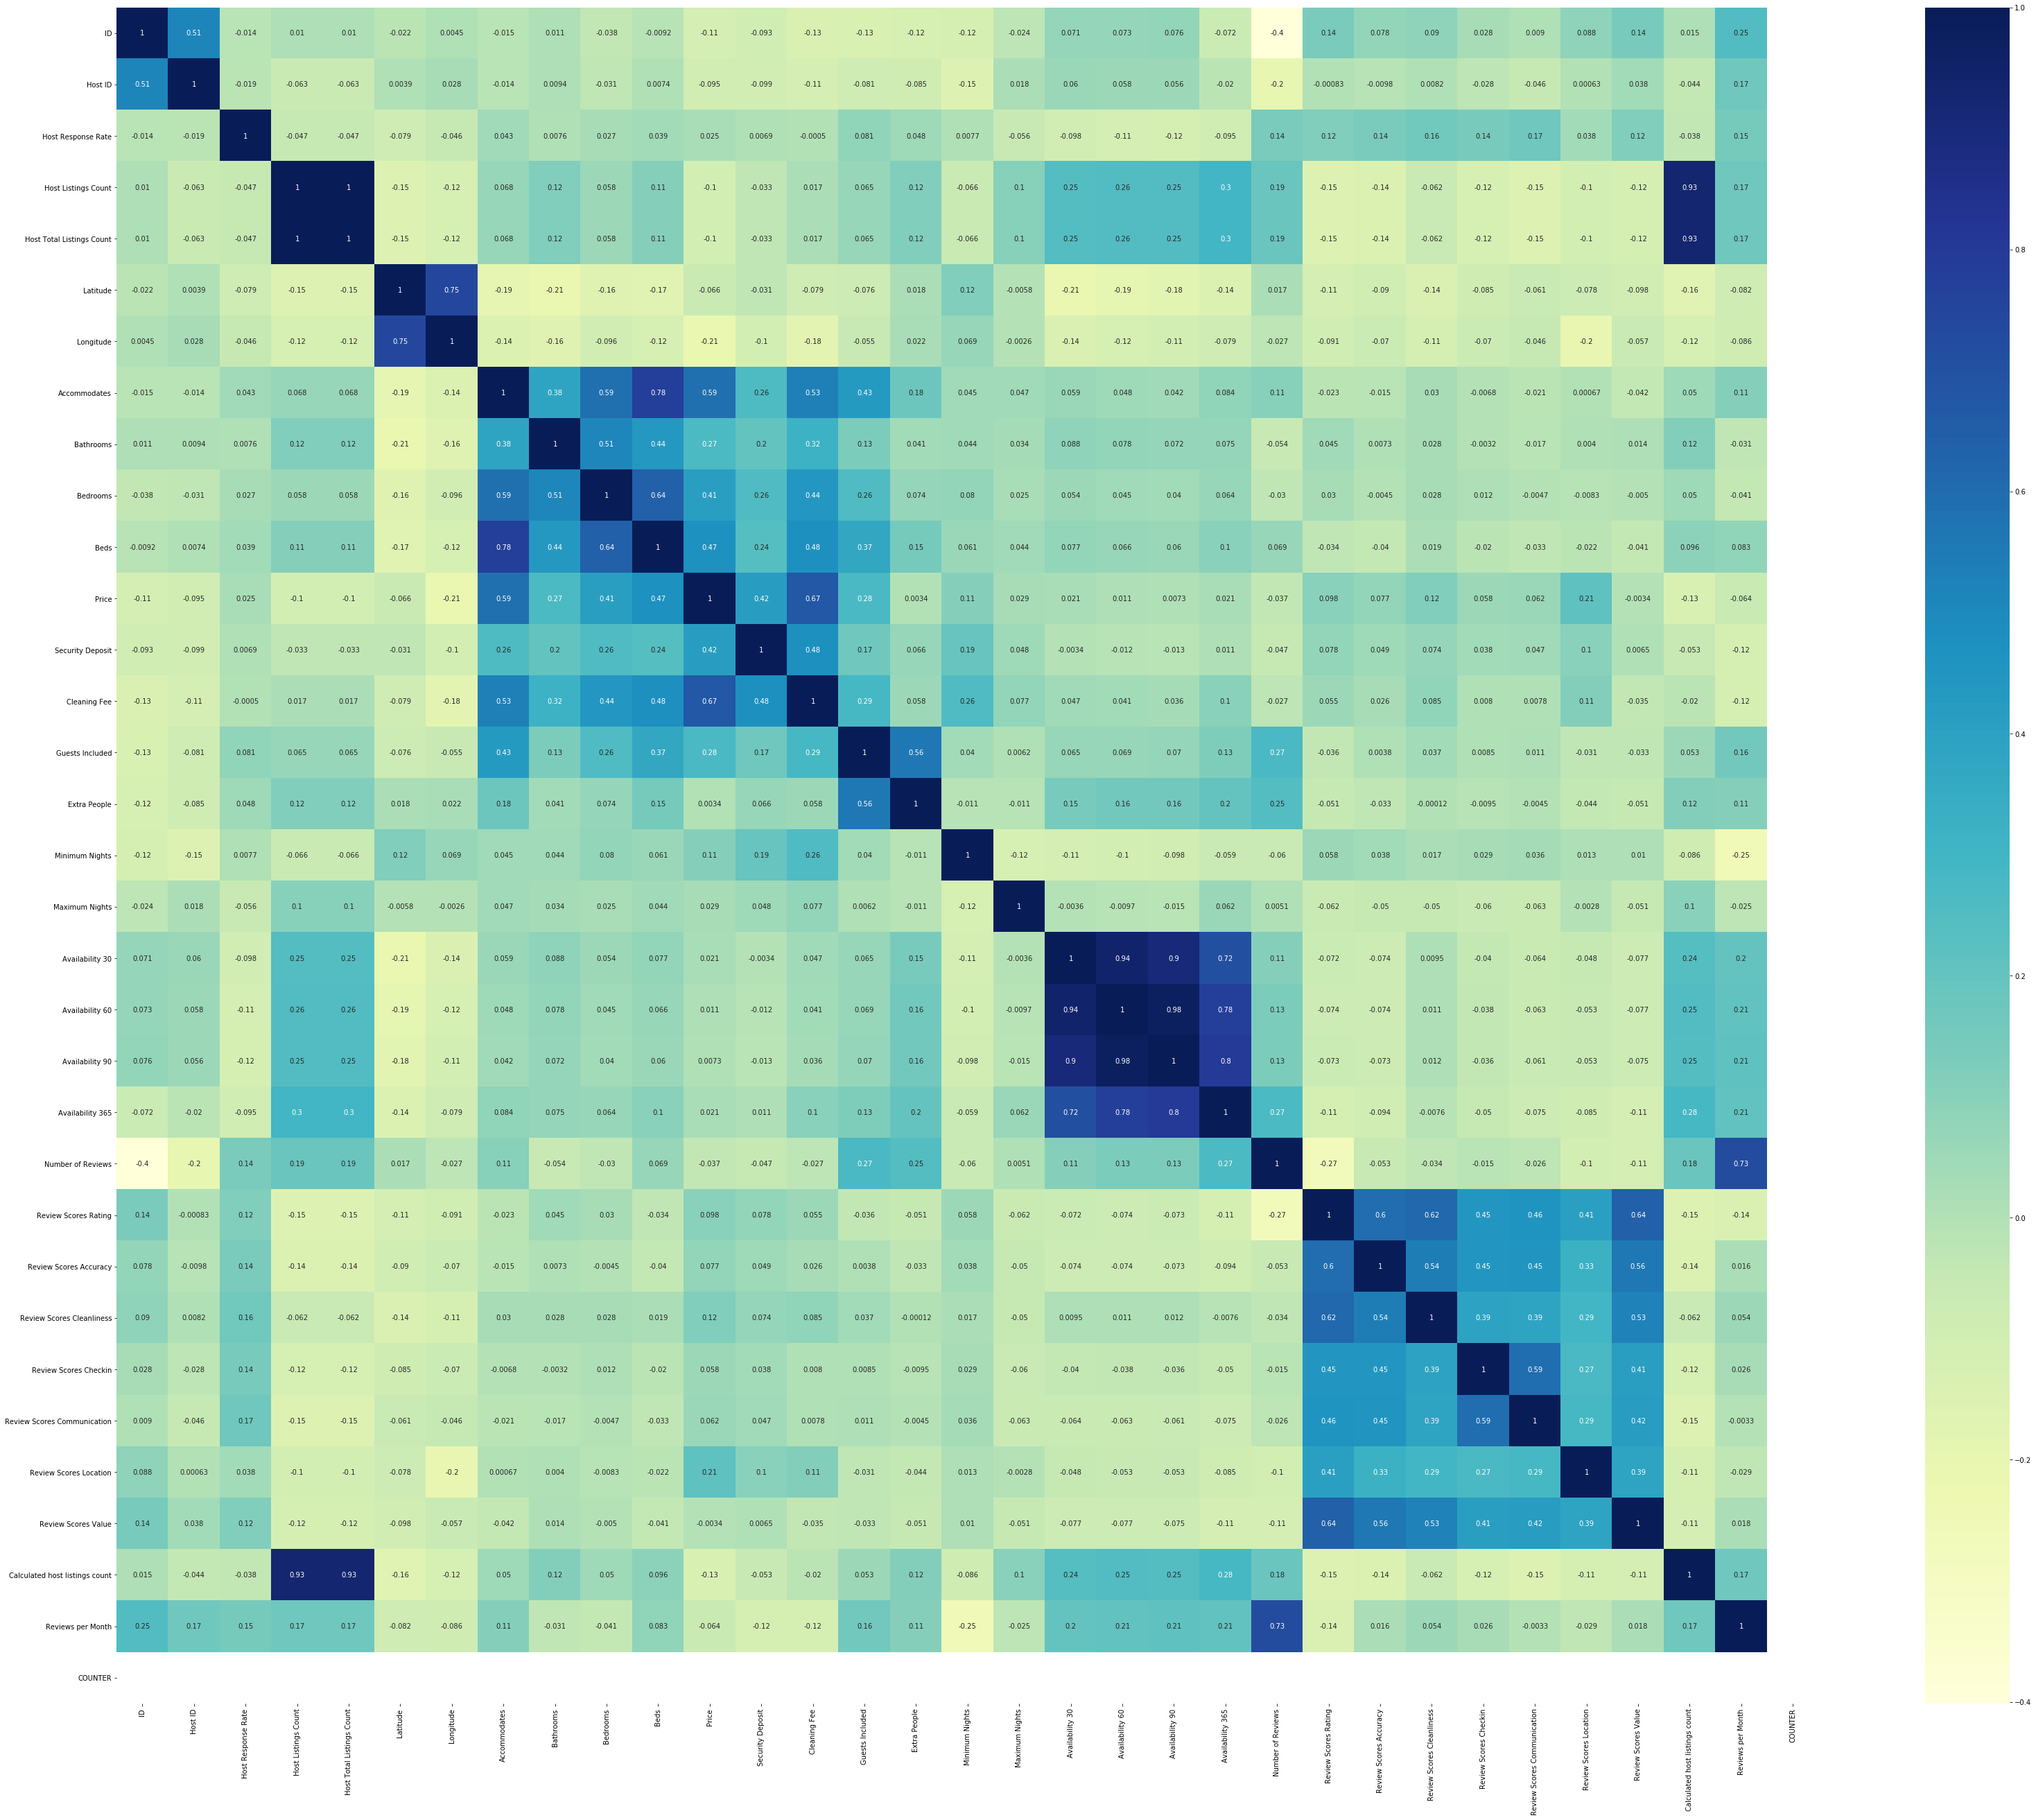

In [29]:
corr = df1.corr(method ="spearman")
plt.figure(figsize=(55,45))
sns.heatmap(corr, cmap="YlGnBu",annot=True)